In [147]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

In [165]:
diabetes = datasets.load_wine()
X = diabetes.data
y = diabetes.target

In [166]:
pca = PCA(n_components=2)
X = pca.fit_transform(X)

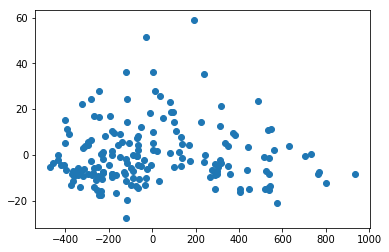

In [167]:
plt.scatter(X[:, 0], X[:, 1])

In [185]:
def kmeans(X, k, threshold=0.1):
    # セントロイドの初期化
    centroids = []
    for ki in range(k):
        centroids += [X[np.random.choice(len(X))].tolist()]
    centroids = np.array(centroids)
        
    iteration = 0
    while True:
        clusters = []
        # クラスタを求める
        for i, xi in enumerate(X):
            min_dist = np.inf
            dist_list = []
            for ki in centroids:
                dist_list += [np.sqrt((xi[0] - ki[0])**2 + (xi[1] - ki[1])**2)]
            clusters += [np.argsort(dist_list)[0]]
        clusters = np.array(clusters)
        
        #クラスタの描画
        fig = plt.figure()
        for ki in range(k):
            plt.scatter(X[clusters == ki, 0], X[clusters == ki, 1])
        plt.xlabel(f"Iteration: {iteration}")
        plt.show()

        old_centroids = centroids.copy()
        # セントロイドを更新
        for ki in range(k):
            centroids[ki] = np.mean(X[clusters == ki])
        diff = np.mean((centroids - old_centroids)**2)
        print("Update", diff)
        
        if diff < threshold:
            break
        iteration += 1

    return centroids, clusters

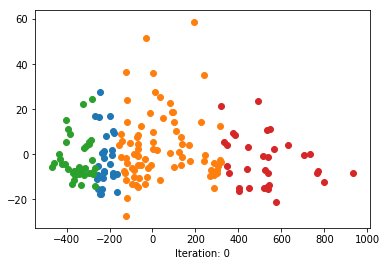

Update 46829.96959775345


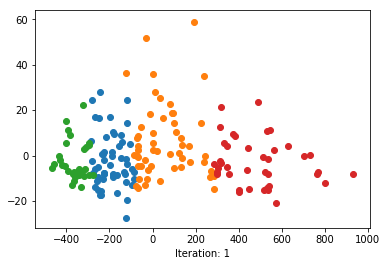

Update 183.39033844531147


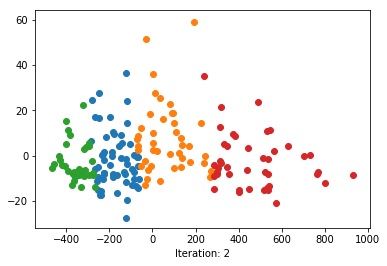

Update 50.47461543696496


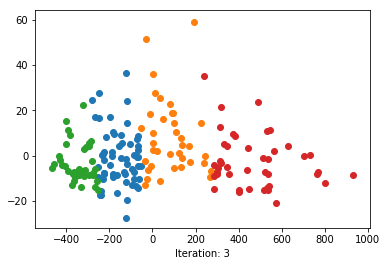

Update 40.978469567390704


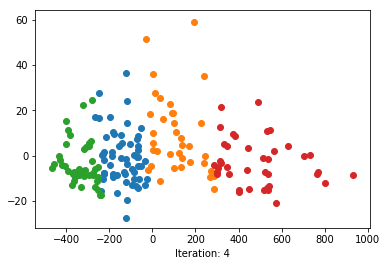

Update 93.48593856746618


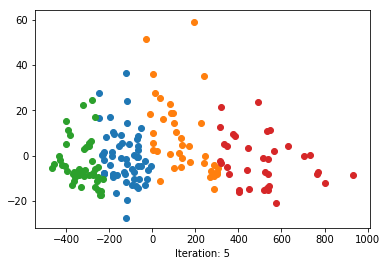

Update 78.63211310385682


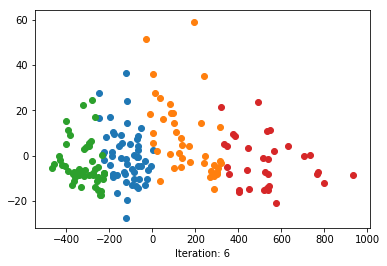

Update 46.319338646694675


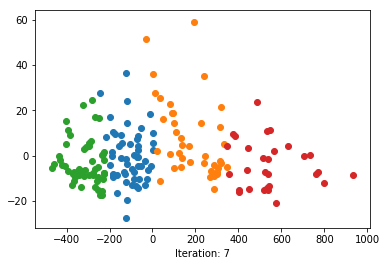

Update 78.64158115337902


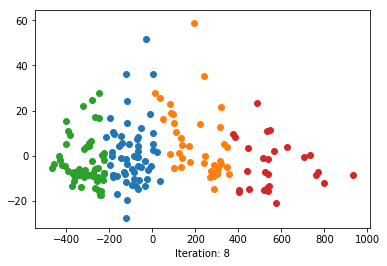

Update 61.4016280896582


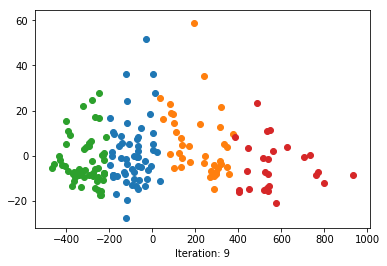

Update 9.296048572643823


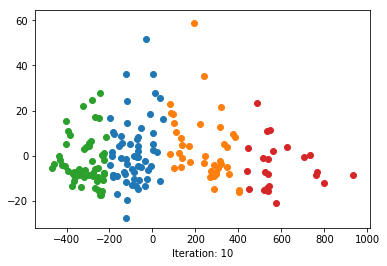

Update 62.201912496273685


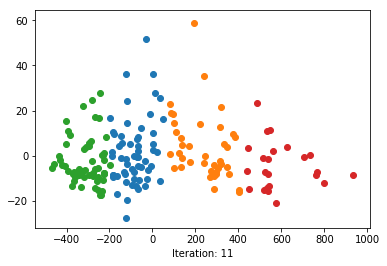

Update 0.4825414635608858


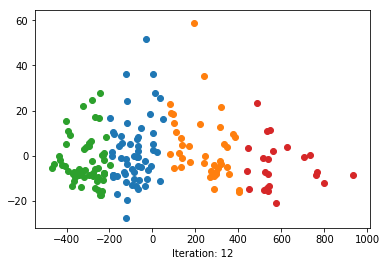

Update 0.0


In [186]:
centroids, clusters = kmeans(X, 4)